# Brain Tumor Classification

#### Necessary libraries


In [44]:
import numpy as np
import tensorflow as tf
import keras
import os, shutil

print ("TensorFlow version: " + tf.__version__)
print ("Keras version: " + keras.__version__)

from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

TensorFlow version: 2.4.1
Keras version: 2.4.3


### Data loading 

I divided the data into four categories. Three of them contain different kinds of brain tumor, and the last one contains brain images without tumor.

In [2]:
models_dir = 'C:/Users/kuba_/Desktop/Studia/IIsemestr1/data_mining/lab/models/final_project_models/'
if not os.path.exists(models_dir):
    os.mkdir(models_dir)
    
base_dir = 'C:/Users/kuba_/Desktop/Studia/IIsemestr1/data_mining/lab/data/brain_tumor_classification'
original_data_dir = 'C:/Users/kuba_/Desktop/Studia/IIsemestr1/data_mining/lab/data/brain_tumor_classification/data_to_split'

train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)


In [3]:
# Directory with training glioma_tumor pictures
glioma_tumor_train_dir = os.path.join(train_dir, 'glioma_tumor')
if not os.path.exists(glioma_tumor_train_dir):
    os.mkdir(glioma_tumor_train_dir)

# Directory with training meiningioma_tumor pictures
meiningioma_tumor_train_dir = os.path.join(train_dir, 'meiningioma_tumor')
if not os.path.exists(meiningioma_tumor_train_dir):
    os.mkdir(meiningioma_tumor_train_dir)
    
# Directory with training pituitary_tumor pictures
pituitary_tumor_train_dir = os.path.join(train_dir, 'pituitary_tumor')
if not os.path.exists(pituitary_tumor_train_dir):
    os.mkdir(pituitary_tumor_train_dir)
        
# Directory with training no_tumor pictures
no_tumor_train_dir = os.path.join(train_dir, 'no_tumor')
if not os.path.exists(no_tumor_train_dir):
    os.mkdir(no_tumor_train_dir)

In [4]:
# Directory with validation glioma_tumor pictures
glioma_tumor_validation_dir = os.path.join(validation_dir, 'glioma_tumor')
if not os.path.exists(glioma_tumor_validation_dir):
    os.mkdir(glioma_tumor_validation_dir)

# Directory with validation meiningioma_tumor pictures
meiningioma_tumor_validation_dir = os.path.join(validation_dir, 'meiningioma_tumor')
if not os.path.exists(meiningioma_tumor_validation_dir):
    os.mkdir(meiningioma_tumor_validation_dir)
    
# Directory with validation pituitary_tumor pictures
pituitary_tumor_validation_dir = os.path.join(validation_dir, 'pituitary_tumor')
if not os.path.exists(pituitary_tumor_validation_dir):
    os.mkdir(pituitary_tumor_validation_dir)
        
# Directory with validation no_tumor pictures
no_tumor_validation_dir = os.path.join(validation_dir, 'no_tumor')
if not os.path.exists(no_tumor_validation_dir):
    os.mkdir(no_tumor_validation_dir)

In [6]:
print(os.listdir(test_dir))


['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [5]:
for class_dir in os.listdir(original_data_dir):
        for num, filename in enumerate(os.listdir(original_data_dir + '/' + class_dir)):
            img = original_data_dir + '/' + class_dir + '/' + filename
            if num < 200:
                if class_dir == 'glioma_tumor':
                    shutil.copyfile(img, glioma_tumor_validation_dir + '/' + filename)
                elif class_dir == 'meningioma_tumor':
                    shutil.copyfile(img, meiningioma_tumor_validation_dir + '/' + filename)
                elif class_dir == 'pituitary_tumor':
                    shutil.copyfile(img, pituitary_tumor_validation_dir + '/' + filename)
                elif class_dir == 'no_tumor':
                    shutil.copyfile(img, no_tumor_validation_dir + '/' + filename)
            elif num < 800:
                if class_dir == 'glioma_tumor':
                    shutil.copyfile(img, glioma_tumor_train_dir + '/' + filename)
                elif class_dir == 'meningioma_tumor':
                    shutil.copyfile(img, meiningioma_tumor_train_dir + '/' + filename)
                elif class_dir == 'pituitary_tumor':
                    shutil.copyfile(img, pituitary_tumor_train_dir + '/' + filename)
                elif class_dir == 'no_tumor':
                    shutil.copyfile(img, no_tumor_train_dir + '/' + filename)
            else:
                break
                    


In [8]:
print('total training images:', len(os.listdir(glioma_tumor_train_dir)) + len(os.listdir(meiningioma_tumor_train_dir)) + 
         len(os.listdir(pituitary_tumor_train_dir)) + len(os.listdir(no_tumor_train_dir)))
print('total validation images:', len(os.listdir(glioma_tumor_validation_dir)) + 
      len(os.listdir(meiningioma_tumor_validation_dir)) + len(os.listdir(pituitary_tumor_validation_dir)) + 
      len(os.listdir(no_tumor_validation_dir)))
print('total test images:', sum([len(files[2]) for files in os.walk(test_dir)]))

total training images: 1995
total validation images: 800
total test images: 394


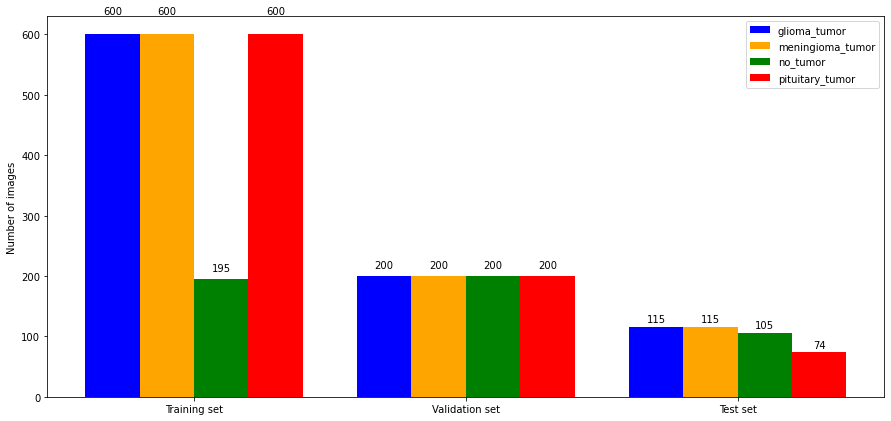

In [9]:
%matplotlib inline
no_of_test_imgs = [len(files[2]) for files in os.walk(test_dir)][1:]
no_of_images = [[len(os.listdir(glioma_tumor_train_dir)), len(os.listdir(glioma_tumor_validation_dir)), no_of_test_imgs[0]],
                [len(os.listdir(meiningioma_tumor_train_dir)), len(os.listdir(meiningioma_tumor_validation_dir)), no_of_test_imgs[1]],
                [len(os.listdir(no_tumor_train_dir)), len(os.listdir(no_tumor_validation_dir)), no_of_test_imgs[2]],
                [len(os.listdir(pituitary_tumor_train_dir)), len(os.listdir(pituitary_tumor_validation_dir)), no_of_test_imgs[3]]]

set_types = ['Training set', 'Validation set', 'Test set']
x = np.arange(len(set_types))

fig, ax = plt.subplots(figsize = (15, 7))

width = 0.2
rects1 = ax.bar(x-0.3, no_of_images[1], color = 'blue', width = width, label = (os.listdir(test_dir))[0])
rects2 = ax.bar(x-0.1, no_of_images[1], color = 'orange', width = width, label = (os.listdir(test_dir))[1])
rects3 = ax.bar(x + 0.1, no_of_images[2], color = 'green', width = width, label = (os.listdir(test_dir))[2])
rects4 = ax.bar(x + 0.3, no_of_images[3], color = 'red', width = width, label = (os.listdir(test_dir))[3])

ax.set_ylabel('Number of images')
ax.set_xticks(x)
ax.set_xticklabels(set_types)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.show()

## Data preprocessing


In [9]:
from keras.preprocessing.image import ImageDataGenerator

# target image shape 
img_rows = 256
img_cols = 256

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_rows, img_cols),
    batch_size=10,
    class_mode='categorical',
    shuffle=True)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_rows, img_cols),
    batch_size=10,
    class_mode='categorical',
    shuffle=True)

Found 1995 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [11]:
print(train_generator.class_indices)
print(train_generator.image_shape)

{'glioma_tumor': 0, 'meiningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
(256, 256, 3)


In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (10, 256, 256, 3)
labels batch shape: (10, 4)


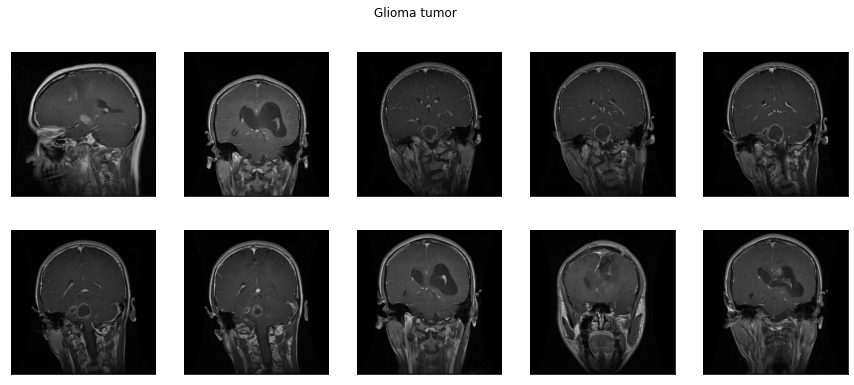

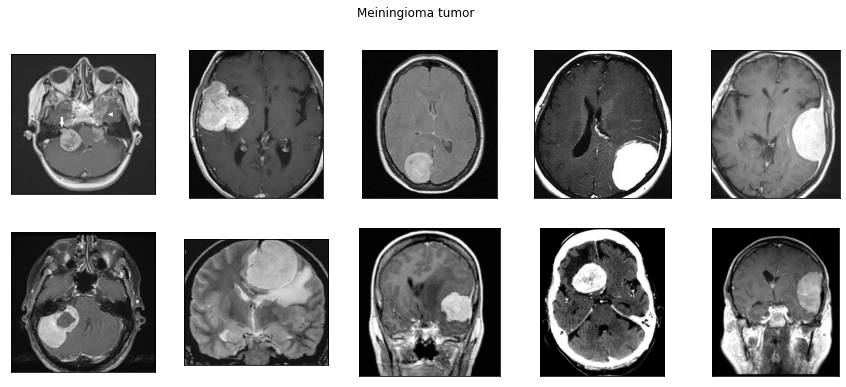

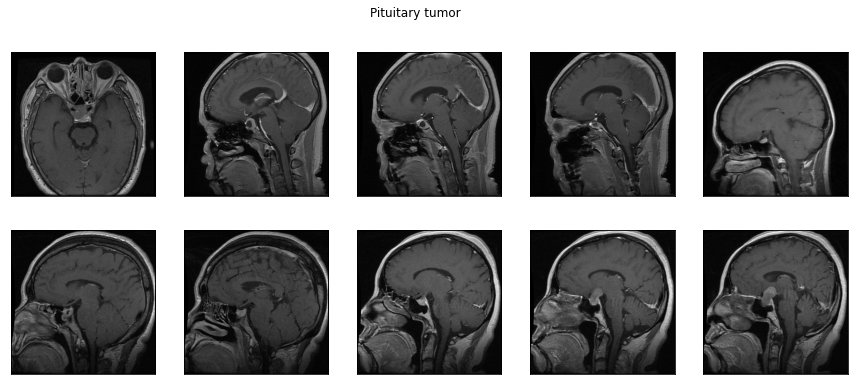

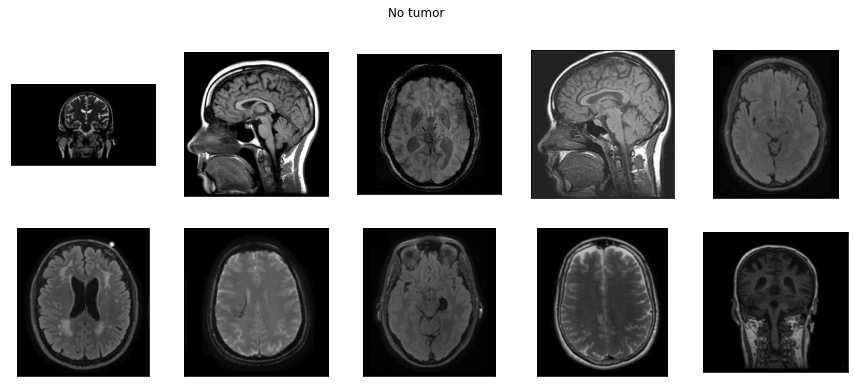

In [13]:
glioma_files = os.listdir(glioma_tumor_train_dir)[:10]
meiningioma_files = os.listdir(meiningioma_tumor_train_dir)[:10]
pituitary_files = os.listdir(pituitary_tumor_train_dir)[:10]
no_tumor_files = os.listdir(no_tumor_train_dir)[:10]

c=1
plt.figure(figsize=(15,6))

for file in glioma_files:
    img = plt.imread(glioma_tumor_train_dir + '/' + file)
    plt.subplot(2,5,c)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    c += 1
    
plt.suptitle('Glioma tumor')
plt.show()
#############################################################
c=1
plt.figure(figsize=(15,6))

for file in meiningioma_files:
    img = plt.imread(meiningioma_tumor_train_dir + '/' + file)
    plt.subplot(2,5,c)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    c += 1
    
plt.suptitle('Meiningioma tumor')
plt.show()
#############################################################
c=1
plt.figure(figsize=(15,6))

for file in pituitary_files:
    img = plt.imread(pituitary_tumor_train_dir + '/' + file)
    plt.subplot(2,5,c)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    c += 1
    
plt.suptitle('Pituitary tumor')
plt.show()
############################################################
plt.figure(figsize=(15,6))
c=1

for file in no_tumor_files:
    img = plt.imread(no_tumor_train_dir + '/' + file)
    plt.subplot(2,5,c)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    c += 1
    
plt.suptitle('No tumor')
plt.show()

# Models

### 

In [14]:
 def PlotAccuracyComparison(acc, val_acc, lab = '*'):
    plt.clf()   
    plt.rcParams['figure.figsize'] = (25.0, 5.0) 
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training accuracy for ' + lab)
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy for ' + lab)
    plt.title('Comparison of Training and Validation Accuracies')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def PlotLossComparison(loss, val_loss, lab = '*'):
    plt.clf()   
    plt.rcParams['figure.figsize'] = (25.0, 5.0) 
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'bo', label='Training loss for ' + lab)
    plt.plot(epochs, val_loss, 'b', label='Validation loss for ' + lab)
    plt.title('Comparison of Training and Validation Losses')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

### First model


FInally I created a simple neural network architecture to see how data will behave

In [15]:
model1 = models.Sequential()
model1.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(4, activation='sigmoid'))

model1.summary()
model1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9

In [16]:
history1 = model1.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size)

C:\Users\kuba_\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
199/199 [==============================] - 116s 573ms/step - loss: 1.1625 - acc: 0.4952 - val_loss: 1.3324 - val_acc: 0.3400
Epoch 2/20
199/199 [==============================] - 118s 592ms/step - loss: 0.8104 - acc: 0.6713 - val_loss: 1.3596 - val_acc: 0.3550
Epoch 3/20
199/199 [==============================] - 126s 634ms/step - loss: 0.6720 - acc: 0.7332 - val_loss: 1.1204 - val_acc: 0.4975
Epoch 4/20
199/199 [==============================] - 142s 713ms/step - loss: 0.6146 - acc: 0.7662 - val_loss: 1.2349 - val_acc: 0.4787
Epoch 5/20
199/199 [==============================] - 162s 810ms/step - loss: 0.5179 - acc: 0.8100 - val_loss: 1.2516 - val_acc: 0.4787
Epoch 6/20
199/199 [==============================] - 158s 796ms/step - loss: 0.4739 - acc: 0.8197 - val_loss: 1.3285 - val_acc: 0.4963
Epoch 7/20
199/199 [==============================] - 145s 726ms/step - loss: 0.4089 - acc: 0.8441 - val_loss: 1.4129 - val_acc: 0.4700
Epoch 8/20
199/199 [============================

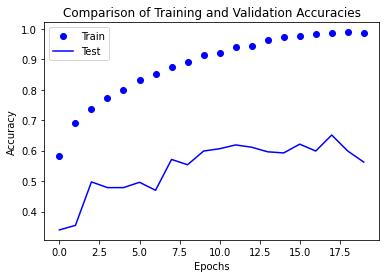

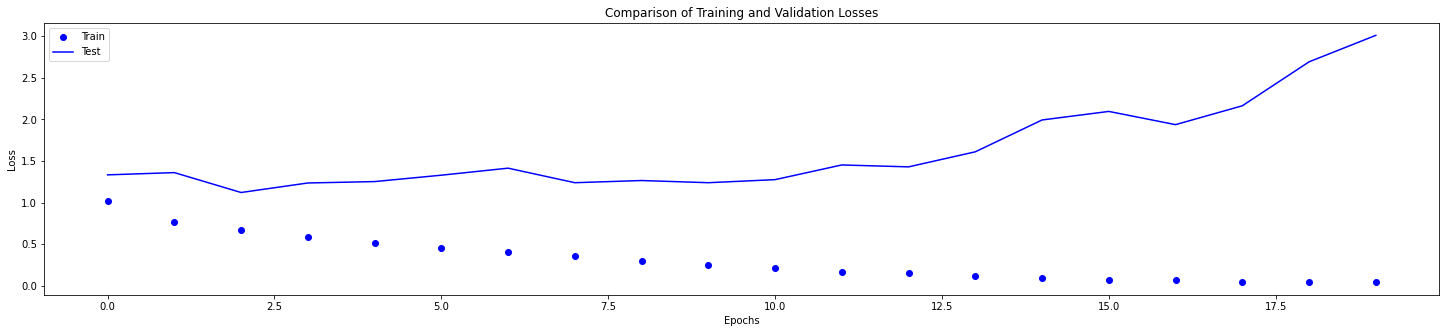

In [17]:
acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

PlotAccuracyComparison(acc1, val_acc1, lab = 'Model 1')

PlotLossComparison(loss1, val_loss1, lab = 'Model 1')

## adding dropout layer to fight overfitting

In [20]:
model1a = models.Sequential()
model1a.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model1a.add(layers.MaxPooling2D((2, 2)))
model1a.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1a.add(layers.MaxPooling2D((2, 2)))
model1a.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1a.add(layers.MaxPooling2D((2, 2)))
model1a.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1a.add(layers.MaxPooling2D((2, 2)))
model1a.add(layers.Flatten())
model1a.add(layers.Dense(64, activation='relu'))
model1a.add(layers.Dropout(0.2))
model1a.add(layers.Dense(4, activation='sigmoid'))

model1a.summary()
model1a.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)       

In [21]:
history1a = model1a.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/20
199/199 [==============================] - 107s 498ms/step - loss: 1.2052 - acc: 0.4833 - val_loss: 1.2300 - val_acc: 0.4525
Epoch 2/20
199/199 [==============================] - 102s 503ms/step - loss: 0.9095 - acc: 0.6437 - val_loss: 1.5011 - val_acc: 0.2900
Epoch 3/20
199/199 [==============================] - 109s 535ms/step - loss: 0.8060 - acc: 0.6833 - val_loss: 1.3407 - val_acc: 0.3575
Epoch 4/20
199/199 [==============================] - 115s 566ms/step - loss: 0.6913 - acc: 0.7103 - val_loss: 1.4112 - val_acc: 0.4750
Epoch 5/20
199/199 [==============================] - 119s 584ms/step - loss: 0.6453 - acc: 0.7374 - val_loss: 1.3292 - val_acc: 0.3925
Epoch 6/20
199/199 [==============================] - 122s 599ms/step - loss: 0.5793 - acc: 0.7646 - val_loss: 1.2881 - val_acc: 0.4750
Epoch 7/20
199/199 [==============================] - 120s 591ms/step - loss: 0.5276 - acc: 0.8031 - val_loss: 1.2085 - val_acc: 0.4900
Epoch 8/20
199/199 [============================

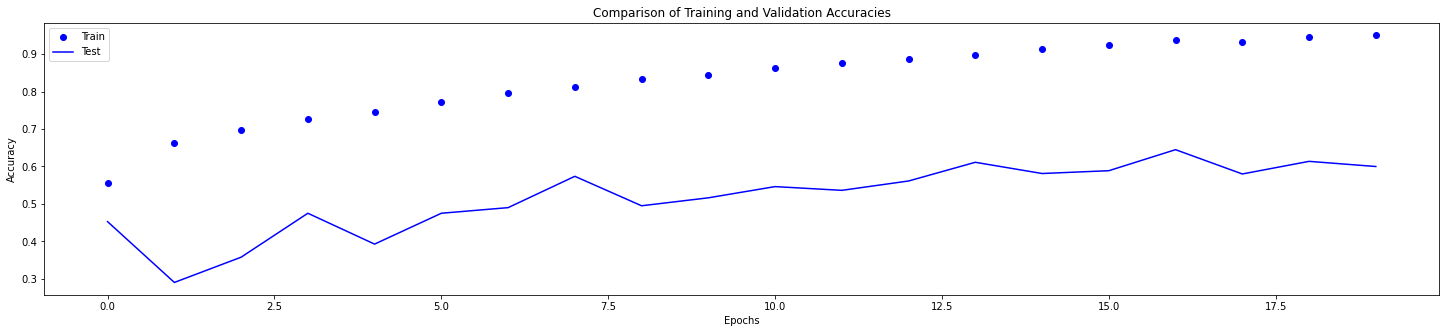

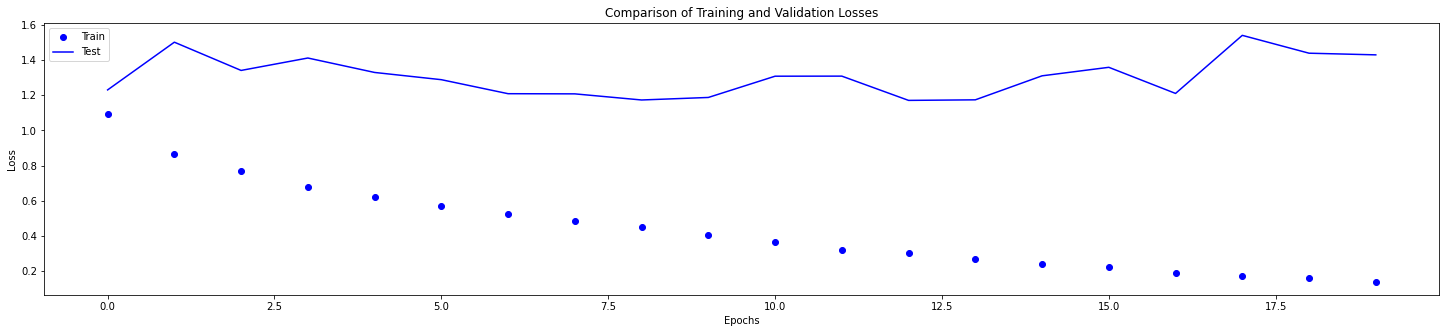

In [22]:
acc1a = history1a.history['acc']
val_acc1a = history1a.history['val_acc']
loss1a = history1a.history['loss']
val_loss1a = history1a.history['val_loss']

PlotAccuracyComparison(acc1a, val_acc1a, lab = 'Model 1a')

PlotLossComparison(loss1a, val_loss1a, lab = 'Model 1a')

## using data augmentation

In [36]:
train_datagen_aug = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(img_rows, img_cols),
    batch_size=10,
    class_mode='categorical')

Found 1995 images belonging to 4 classes.


In [24]:
model2 = models.Sequential()
model2.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(4, activation='sigmoid'))

model2.summary()
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)       

In [25]:
history2 = model2.fit_generator(
      train_generator_aug,
      steps_per_epoch=train_generator_aug.samples//train_generator_aug.batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/20
199/199 [==============================] - 170s 827ms/step - loss: 1.3378 - acc: 0.3220 - val_loss: 1.4884 - val_acc: 0.3288
Epoch 2/20
199/199 [==============================] - 152s 752ms/step - loss: 1.2307 - acc: 0.4212 - val_loss: 1.4969 - val_acc: 0.3187
Epoch 3/20
199/199 [==============================] - 151s 743ms/step - loss: 1.1463 - acc: 0.4905 - val_loss: 1.4885 - val_acc: 0.3350
Epoch 4/20
199/199 [==============================] - 151s 745ms/step - loss: 1.1124 - acc: 0.4910 - val_loss: 1.4125 - val_acc: 0.3625
Epoch 5/20
199/199 [==============================] - 147s 724ms/step - loss: 1.0894 - acc: 0.5107 - val_loss: 1.3632 - val_acc: 0.3913
Epoch 6/20
199/199 [==============================] - 187s 926ms/step - loss: 1.0500 - acc: 0.5443 - val_loss: 1.3868 - val_acc: 0.3187
Epoch 7/20
199/199 [==============================] - 171s 838ms/step - loss: 1.0060 - acc: 0.5605 - val_loss: 1.3025 - val_acc: 0.4363
Epoch 8/20
199/199 [============================

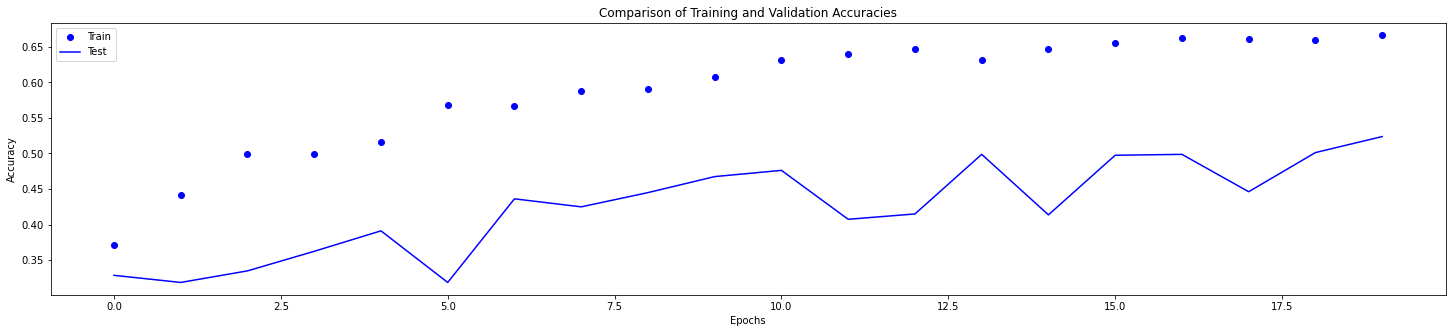

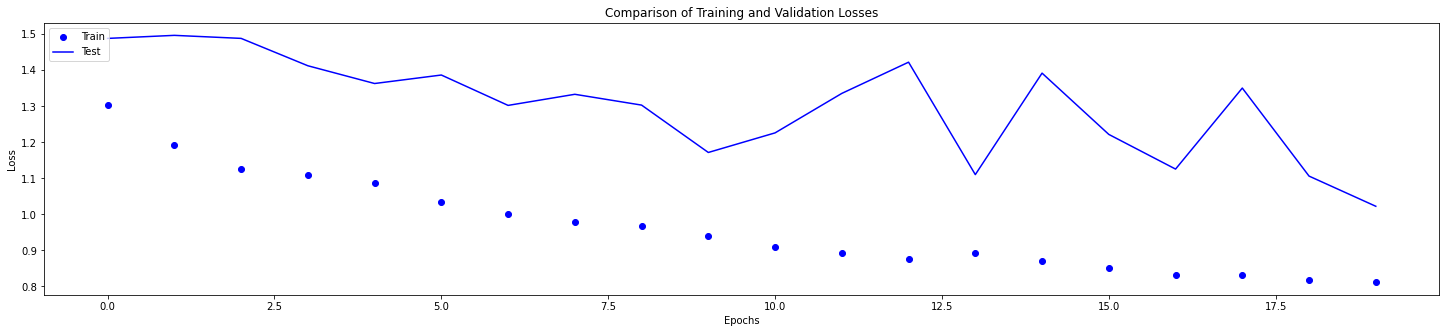

In [26]:
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

PlotAccuracyComparison(acc2, val_acc2, lab = 'Model 2')

PlotLossComparison(loss2, val_loss2, lab = 'Model 2')

### Added dropout layer, because model overfits

In [27]:
model3 = models.Sequential()
model3.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(4, activation='sigmoid'))

model3.summary()
model3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)       

In [28]:
history3 = model3.fit_generator(
      train_generator_aug,
      steps_per_epoch=train_generator_aug.samples//train_generator_aug.batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/20
199/199 [==============================] - 195s 956ms/step - loss: 1.3126 - acc: 0.3459 - val_loss: 1.3884 - val_acc: 0.3675
Epoch 2/20
199/199 [==============================] - 200s 985ms/step - loss: 1.2218 - acc: 0.4284 - val_loss: 1.4255 - val_acc: 0.3688
Epoch 3/20
199/199 [==============================] - 200s 985ms/step - loss: 1.1593 - acc: 0.4813 - val_loss: 1.5493 - val_acc: 0.3812
Epoch 4/20
199/199 [==============================] - 196s 964ms/step - loss: 1.1536 - acc: 0.4901 - val_loss: 1.4233 - val_acc: 0.3350
Epoch 5/20
199/199 [==============================] - 200s 983ms/step - loss: 1.1318 - acc: 0.4847 - val_loss: 1.4037 - val_acc: 0.4663
Epoch 6/20
199/199 [==============================] - 197s 969ms/step - loss: 1.0975 - acc: 0.5146 - val_loss: 1.3472 - val_acc: 0.3600
Epoch 7/20
199/199 [==============================] - 202s 997ms/step - loss: 1.0466 - acc: 0.5430 - val_loss: 1.3656 - val_acc: 0.4638
Epoch 8/20
199/199 [============================

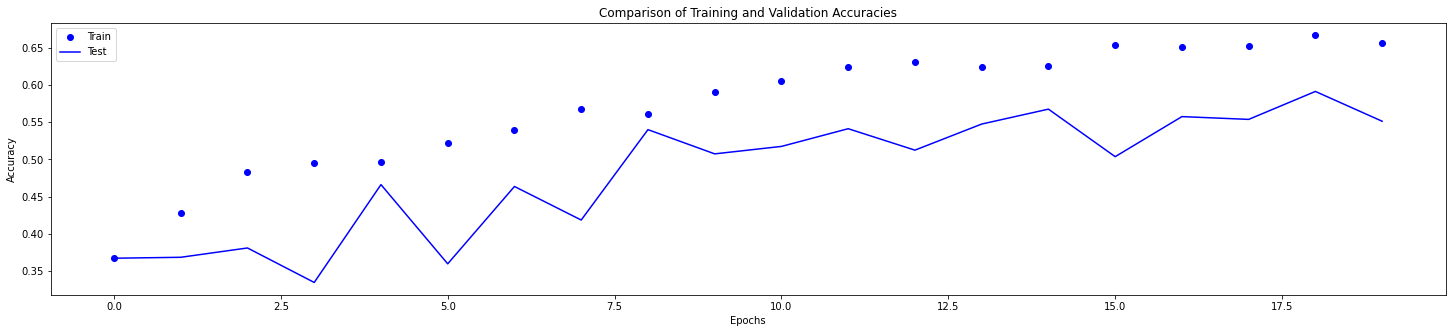

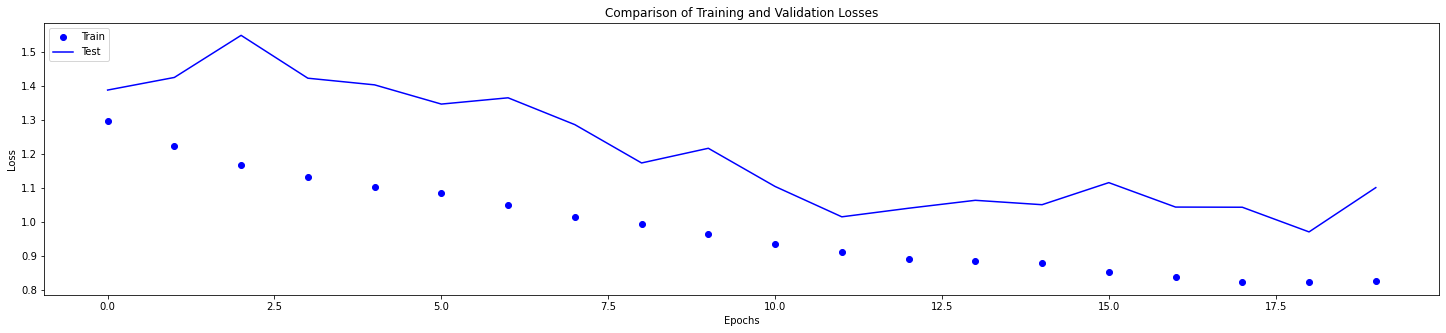

In [29]:
acc3 = history3.history['acc']
val_acc3 = history3.history['val_acc']
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']

PlotAccuracyComparison(acc3, val_acc3, lab = 'Model 3')

PlotLossComparison(loss3, val_loss3, lab = 'Model 3')

### smaller dropout

I decreased dropout, because model still overfits

In [40]:
model4 = models.Sequential()
model4.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dropout(0.1))
model4.add(layers.Dense(4, activation='sigmoid'))

model4.summary()
model4.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 32)       

In [41]:
history4 = model4.fit_generator(
      train_generator_aug,
      steps_per_epoch=train_generator_aug.samples//train_generator_aug.batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/20
199/199 [==============================] - 127s 610ms/step - loss: 1.3281 - acc: 0.3736 - val_loss: 1.4904 - val_acc: 0.3200
Epoch 2/20
199/199 [==============================] - 138s 681ms/step - loss: 1.2467 - acc: 0.4426 - val_loss: 1.4570 - val_acc: 0.3613
Epoch 3/20
199/199 [==============================] - 154s 762ms/step - loss: 1.1615 - acc: 0.4876 - val_loss: 1.4659 - val_acc: 0.3212
Epoch 4/20
199/199 [==============================] - 175s 862ms/step - loss: 1.1223 - acc: 0.4911 - val_loss: 1.5107 - val_acc: 0.3438
Epoch 5/20
199/199 [==============================] - 171s 843ms/step - loss: 1.1002 - acc: 0.5149 - val_loss: 1.4287 - val_acc: 0.3450
Epoch 6/20
199/199 [==============================] - 162s 799ms/step - loss: 1.0345 - acc: 0.5559 - val_loss: 1.3444 - val_acc: 0.3950
Epoch 7/20
199/199 [==============================] - 165s 811ms/step - loss: 1.0151 - acc: 0.5743 - val_loss: 1.4022 - val_acc: 0.3638
Epoch 8/20
199/199 [============================

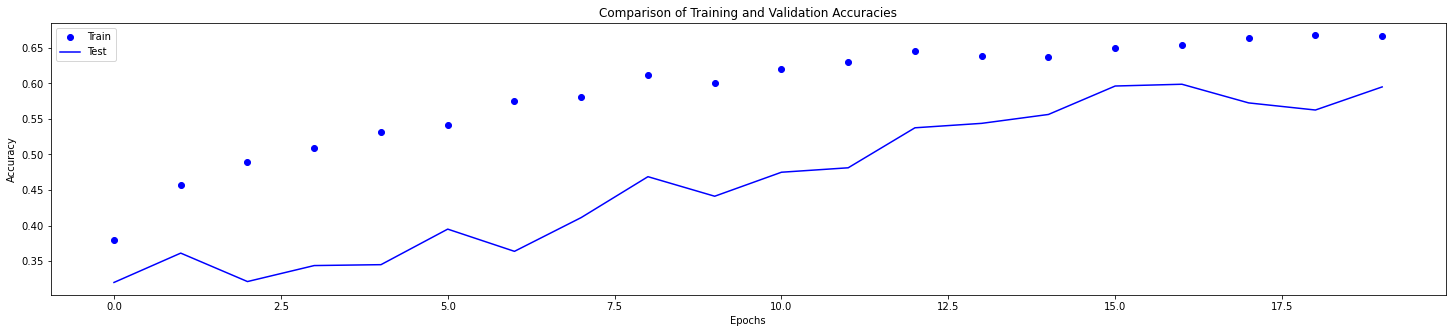

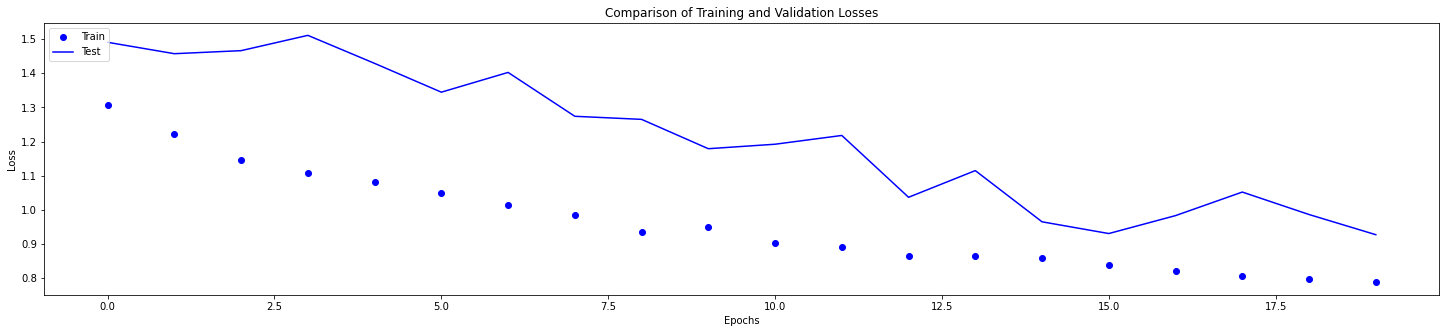

In [42]:
acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

PlotAccuracyComparison(acc4, val_acc4, lab = 'Model 4')

PlotLossComparison(loss4, val_loss4, lab = 'Model 4')

The result looks pretty good, so I decided train the model longer

In [45]:
history4 = model4.fit_generator(
      train_generator_aug,
      steps_per_epoch=train_generator_aug.samples//train_generator_aug.batch_size,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/50
199/199 [==============================] - 126s 616ms/step - loss: 0.7682 - acc: 0.6781 - val_loss: 1.0029 - val_acc: 0.6025
Epoch 2/50
199/199 [==============================] - 148s 736ms/step - loss: 0.7795 - acc: 0.6821 - val_loss: 0.8973 - val_acc: 0.6000
Epoch 3/50
199/199 [==============================] - 160s 793ms/step - loss: 0.7561 - acc: 0.6851 - val_loss: 0.9619 - val_acc: 0.5562
Epoch 4/50
199/199 [==============================] - 170s 840ms/step - loss: 0.7366 - acc: 0.6997 - val_loss: 0.9393 - val_acc: 0.6000
Epoch 5/50
199/199 [==============================] - 151s 746ms/step - loss: 0.7465 - acc: 0.6821 - val_loss: 1.0531 - val_acc: 0.5863
Epoch 6/50
199/199 [==============================] - 156s 776ms/step - loss: 0.7279 - acc: 0.6872 - val_loss: 0.8947 - val_acc: 0.5987
Epoch 7/50
199/199 [==============================] - 155s 766ms/step - loss: 0.7207 - acc: 0.7083 - val_loss: 0.8798 - val_acc: 0.5888
Epoch 8/50
199/199 [============================

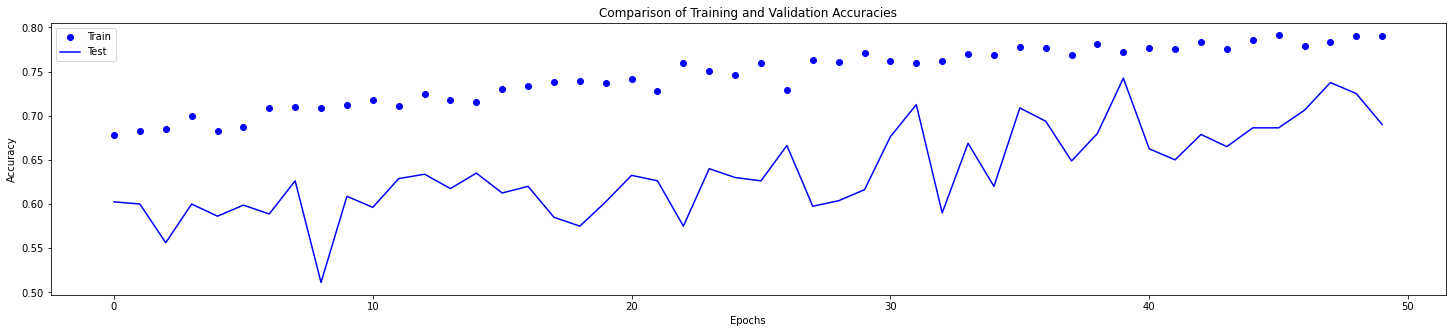

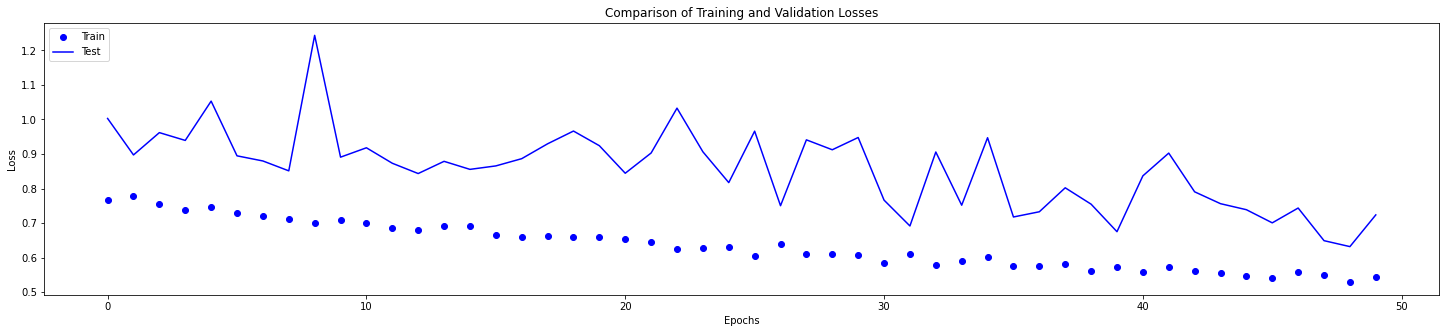

In [46]:
acc4 = history4.history['acc']
val_acc4 = history4.history['val_acc']
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']

PlotAccuracyComparison(acc4, val_acc4, lab = 'Model 4')

PlotLossComparison(loss4, val_loss4, lab = 'Model 4')

I achieved about 70% validation accuracy, but the model overfits as well. Therefore I decided to do a lot of experiments with different amount of layers and hyperparameters.

### other network structure with the best results

In [68]:
model7 = models.Sequential()
model7.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_rows, img_cols, 3)))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(32, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(64, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(128, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Conv2D(256, (3, 3), activation='relu'))
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(layers.Flatten())
model7.add(layers.Dense(512, activation='relu'))
model7.add(layers.Dropout(0.1))
model7.add(layers.Dense(4, activation='sigmoid'))

model7.summary()

model7.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 28, 28, 128)      

In [69]:
history7 = model7.fit_generator(
      train_generator_aug,
      steps_per_epoch=train_generator_aug.samples//train_generator_aug.batch_size,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/20
199/199 [==============================] - 212s 1s/step - loss: 1.3202 - acc: 0.3618 - val_loss: 1.5311 - val_acc: 0.3963
Epoch 2/20
199/199 [==============================] - 209s 1s/step - loss: 1.1785 - acc: 0.4576 - val_loss: 1.4053 - val_acc: 0.3613
Epoch 3/20
199/199 [==============================] - 212s 1s/step - loss: 1.1331 - acc: 0.5022 - val_loss: 1.6199 - val_acc: 0.3150
Epoch 4/20
199/199 [==============================] - 198s 983ms/step - loss: 1.0564 - acc: 0.5544 - val_loss: 1.3376 - val_acc: 0.4062
Epoch 5/20
199/199 [==============================] - 195s 965ms/step - loss: 1.0087 - acc: 0.5881 - val_loss: 1.1550 - val_acc: 0.4925
Epoch 6/20
199/199 [==============================] - 195s 963ms/step - loss: 0.9195 - acc: 0.6114 - val_loss: 1.2944 - val_acc: 0.4575
Epoch 7/20
199/199 [==============================] - 188s 928ms/step - loss: 0.8951 - acc: 0.6291 - val_loss: 1.1097 - val_acc: 0.4988
Epoch 8/20
199/199 [==============================] - 189

Here should be plots of accuracy and loss, but I removed them by accident. The result looked promisingly good, so I decided to train the model for another 50 epochs.

In [71]:
history7 = model7.fit_generator(
      train_generator_aug,
      steps_per_epoch=train_generator_aug.samples//train_generator_aug.batch_size,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size)

Epoch 1/50
199/199 [==============================] - 163s 790ms/step - loss: 0.6340 - acc: 0.7456 - val_loss: 0.7583 - val_acc: 0.6675
Epoch 2/50
199/199 [==============================] - 188s 930ms/step - loss: 0.6092 - acc: 0.7526 - val_loss: 0.7812 - val_acc: 0.6650
Epoch 3/50
199/199 [==============================] - 162s 798ms/step - loss: 0.6012 - acc: 0.7577 - val_loss: 0.7565 - val_acc: 0.7125
Epoch 4/50
199/199 [==============================] - 157s 776ms/step - loss: 0.5897 - acc: 0.7783 - val_loss: 0.8150 - val_acc: 0.6150
Epoch 5/50
199/199 [==============================] - 191s 950ms/step - loss: 0.5515 - acc: 0.7869 - val_loss: 0.7101 - val_acc: 0.6938
Epoch 6/50
199/199 [==============================] - 186s 912ms/step - loss: 0.5415 - acc: 0.7874 - val_loss: 0.9426 - val_acc: 0.6587
Epoch 7/50
199/199 [==============================] - 175s 860ms/step - loss: 0.5412 - acc: 0.7879 - val_loss: 0.7122 - val_acc: 0.6800
Epoch 8/50
199/199 [============================

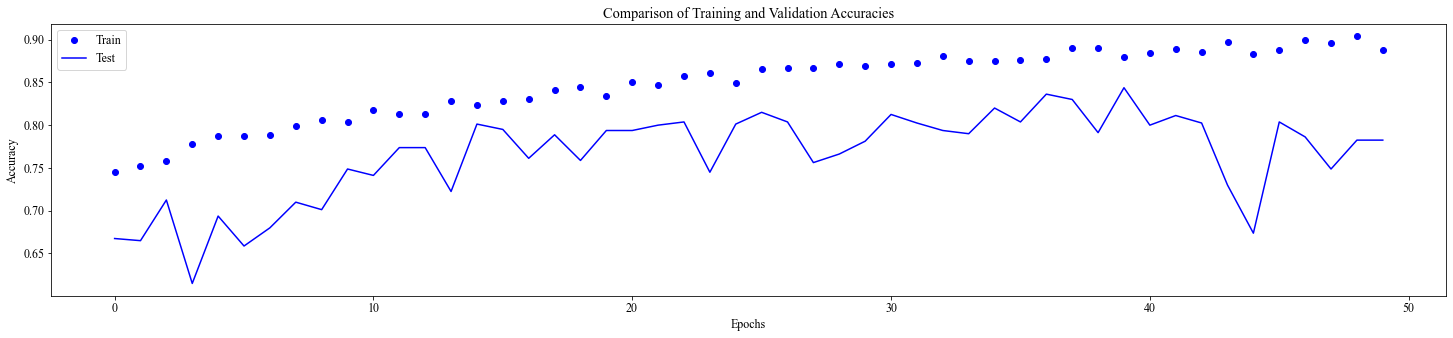

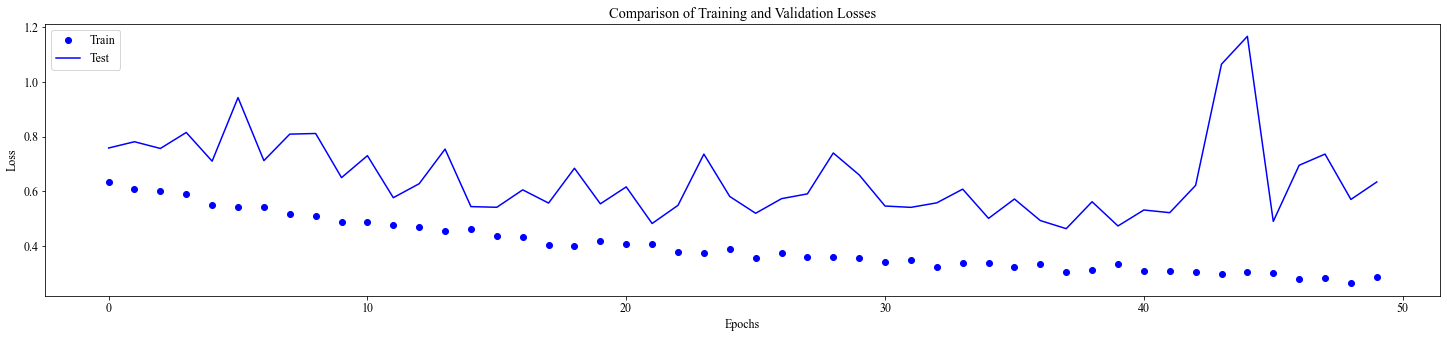

In [72]:
acc7 = history7.history['acc']
val_acc7 = history7.history['val_acc']
loss7 = history7.history['loss']
val_loss7 = history7.history['val_loss']

PlotAccuracyComparison(acc7, val_acc7, lab = 'Model 7')
PlotLossComparison(loss7, val_loss7, lab = 'Model 7')

## Evaluating model

In [7]:
model_to_predict = models.load_model(models_dir + 'model7_after_70_epochs.h5')

In [49]:
test_final_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_final_datagen.flow_from_directory(
        test_dir,
        target_size=(img_rows, img_cols),
        batch_size=10,
        class_mode='categorical',
        shuffle=False)

Found 394 images belonging to 4 classes.


In [69]:
test_loss, test_acc = model_to_predict.evaluate_generator(test_generator, 
                                                steps=test_generator.samples//test_generator.batch_size)
print('test acc:', test_acc)
print('test loss:', test_loss)

test acc: 0.6384615302085876
test loss: 2.838487148284912


In [67]:
classes = {'0': 'glioma_tumor','1': 'meiningioma_tumor','2': 'no_tumor','3': 'pituitary_tumor'}

def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(10, 10))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=classes.values(),
                yticklabels=classes.values(),
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  
    hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12, rotation=45)
    plt.show()

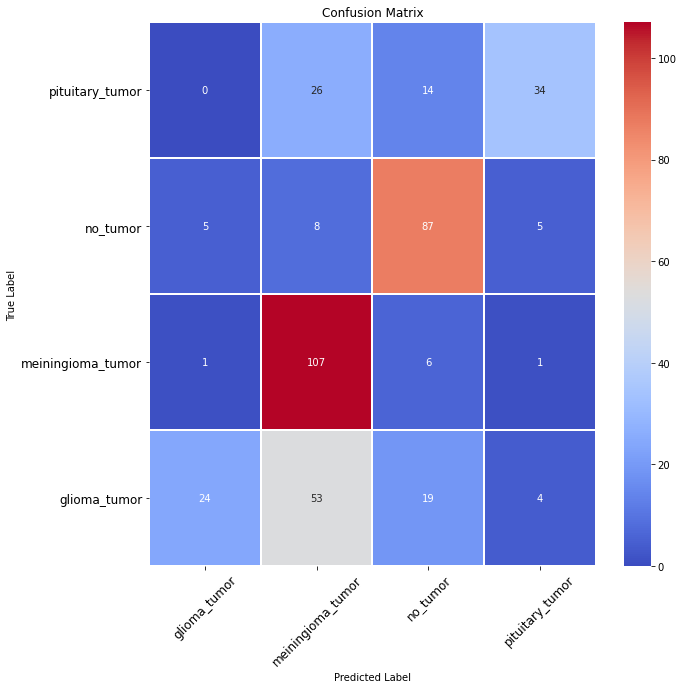

In [68]:
y_val = test_generator.classes
y_pred_val = model_to_predict.predict_generator(test_generator)
max_y_pred_val = np.argmax(y_pred_val, axis=1)

show_confusion_matrix(y_val, max_y_pred_val, 4)

Only *no tumor* and *meiningioma tumor* was classified correctly. The fact is that neural network don't handle with proper classification for other categories, what is probably caused by very high similarity of this tumors.